### Problem 1
Simulate different non-linear models. Three good models to start out with
are: SETAR(2;1;1), IGAR(2;1), and MMAR(2;1). Try different parameters.
For reporting, write the models and discuss the most essential features of
each model together with some informative plots.
Hints
R and Matlab: Check out the script 3dPlotting.R. It starts out showing a
simple way to implement a simulation of a process with a for-loop.

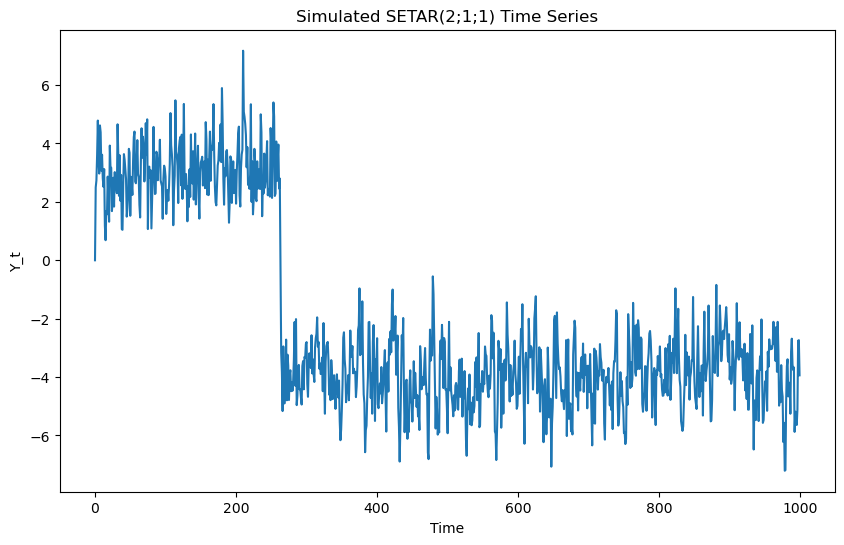

In [ ]:
# Simulate SETAR(2;1;1) with different parameters and plot the results
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)
a_0_1 = -2
a_1_1 = 0.5
a_0_2 = 2
a_1_2 = 0.35

n = 1000
Y = np.zeros(n)
for t in range(1, n):
    if Y[t-1] < 0:
        Y[t] = a_0_1 + a_1_1* Y[t-1] + np.random.normal()
    else:
        Y[t] = a_0_2 + a_1_2 * Y[t-1] + np.random.normal()
df = pd.DataFrame(Y, columns=['Value'])
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x=df.index, y='Value')
plt.title('Simulated SETAR(2;1;1) Time Series')
plt.xlabel('Time')
plt.ylabel('Y_t')
plt.show()

### Simulation of IGAR(2; 1) model

#### Model:

$X_t = a_0^{J_t} + \Sigma_{i=1}^{k_{J_{t}}} a_i^{J_t}X_{t-i} + \varepsilon_t^{(J_t)}$

1000


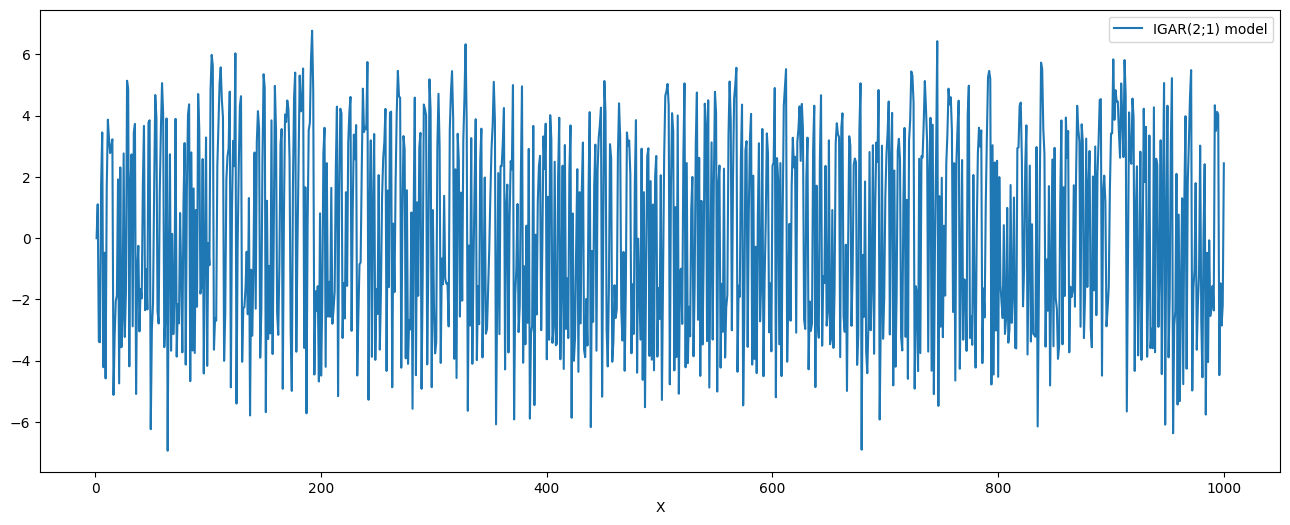

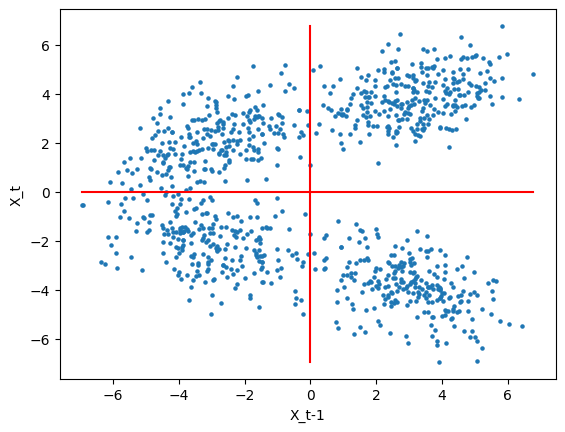

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Parameters
a_00 = 3
a_01 = 0.3
a_10 = -3
a_11 = -0.3
a = [[a_00, a_01], [a_10, a_11]]
p_1 = 0.5 # probability p_1
p_2 = 1 - p_1 # probability p_2

J_t_prob = [p_1, p_2]
J_t_values = [i for i in range(len(J_t_prob))]
n = 1000
t_vec = [i + 1 for i in range(n)]
print(len(t_vec))
X = [0]

# Random variable addition parameters
mu = 0
sigma = 1


for t in range(1, n):

    J_t = random.uniform(0, 1)
    epsilon_t = np.random.normal(mu, sigma)

    for probability_idx in range(len(J_t_prob)):
        if probability_idx == len(J_t_prob) - 1:
            if J_t > J_t_prob[-1]:
                J_t_val = J_t_values[probability_idx]
        elif probability_idx == 0:
            if J_t < J_t_prob[0]:
                J_t_val = J_t_values[probability_idx]
        else:
            if J_t > sum(J_t_prob[ : probability_idx]) and J_t > sum(J_t_prob[ : probability_idx + 1]):
                J_t_val = J_t_values[probability_idx]

    # Appending new values    
    X_t = a[J_t_val][0] + a[J_t_val][1] * X[-1] + epsilon_t
    X.append(X_t)



    

plt.figure(figsize=(16, 6))
plt.plot(t_vec, X, label = "IGAR(2;1) model")
plt.legend()
plt.xlabel('t')
plt.xlabel('X')
plt.show()

# Plot of lag 1

plt.figure()
plt.scatter(X[ : -1], X[1 : ], s=5)
plt.plot(np.linspace(min(X), max(X), n), np.zeros(n), color = "red")
plt.plot(np.zeros(n), np.linspace(min(X), max(X), n), color = "red")
plt.xlabel('X_t-1')
plt.ylabel('X_t')
plt.show()

# Correlation Sample ACF
max_lag = 10

